In [1]:
from keras import layers, models, optimizers, metrics, losses
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


Using TensorFlow backend.


# Load Fashion-MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Visualize Fashion-MNIST dataset

In [3]:
print("train_images.shape", train_images.shape)
print("image shape", train_images[0].shape)
print("train_labels.shape", train_labels.shape)
print("len(train_labels)", len(train_labels))

print("test_images.shape", test_images.shape)
print("image shape", test_images[0].shape)
print("test_labels.shape", test_labels.shape)
print("len(test_labels)", len(test_labels))

train_images.shape (60000, 28, 28)
image shape (28, 28)
train_labels.shape (60000,)
len(train_labels) 60000
test_images.shape (10000, 28, 28)
image shape (28, 28)
test_labels.shape (10000,)
len(test_labels) 10000


In [4]:
train_labels[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

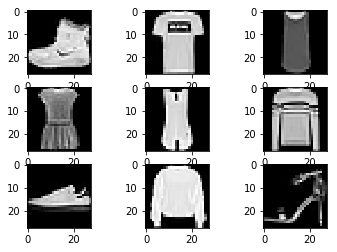

In [5]:
n = 3
for i in range(0, n * n):
    plt.subplot(n, n, 1 + i)
    plt.imshow(train_images[i], cmap='gray')
plt.show()

# Format the dataset

In [6]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
train_labels = to_categorical(train_labels.copy())

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
test_labels = to_categorical(test_labels.copy())

print("train_images.shape", train_images.shape)
print("image shape", train_images[0].shape)
print("train_labels.shape", train_labels.shape)
print("train_labels\n", train_labels)
print("train_labels[0]", train_labels[0])

train_images.shape (60000, 28, 28, 1)
image shape (28, 28, 1)
train_labels.shape (60000, 10)
train_labels
 [[ 0.  0.  0. ...,  0.  0.  1.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
train_labels[0] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


# Design the network

In [7]:
net = models.Sequential()
net.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # need 4D tensor so we need (batch, 28, 28, 1)
net.add(layers.MaxPool2D((2, 2)))        
net.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
net.add(layers.MaxPooling2D(pool_size=(2, 2)))
net.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
net.add(layers.Flatten())
net.add(layers.Dense(64, activation='relu'))
net.add(layers.Dense(10, activation='softmax'))
        
net.summary()
net.compile(optimizer=optimizers.Adam(), 
            loss=losses.categorical_crossentropy,
            metrics=[metrics.categorical_accuracy])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [8]:
history = net.fit(train_images, 
                  train_labels, 
                  epochs=10,
                  batch_size=64,
                  validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.5335 - categorical_accuracy: 0.8044 - val_loss: 0.4083 - val_categorical_accuracy: 0.8538
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3357 - categorical_accuracy: 0.8795 - val_loss: 0.3194 - val_categorical_accuracy: 0.8865
Epoch 3/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.2877 - categorical_accuracy: 0.8945 - val_loss: 0.3031 - val_categorical_accuracy: 0.8904
Epoch 4/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2569 - categorical_accuracy: 0.9064 - val_loss: 0.2783 - val_categorical_accuracy: 0.8987
Epoch 5/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.2345 - categorical_accuracy: 0.9131 - val_loss: 0.2699 - val_categorical_accuracy: 0.9015
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.2152 - c

`The result is about 94.26% on training set and 90.9% on the test set`

In [9]:
from utils import plot_history

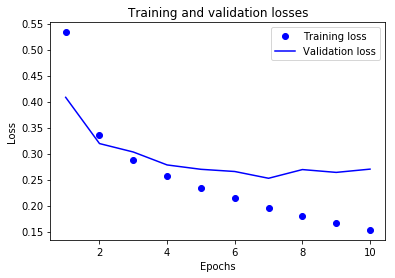

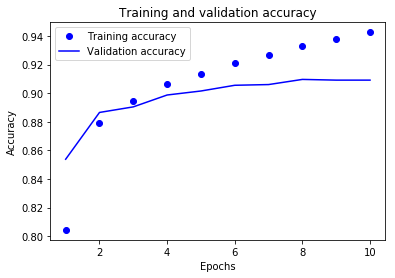

In [10]:
plot_history(history)

# Using data augmentation

In [11]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.05, 
    height_shift_range=0.05, 
    shear_range=0.15, 
    #zoom_range=0.15, 
    horizontal_flip=True, 
    fill_mode='nearest')

## Visualize the data augmentation

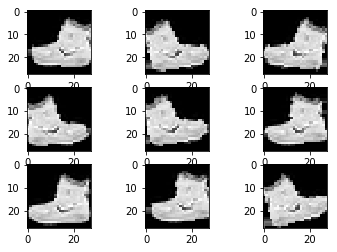

In [12]:
from keras.preprocessing import image

x = train_images[0] # (28, 28, 1)
x = x.reshape((1,) + x.shape) # (1, 28, 28, 1)

n = 3
i = 0 
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(n, n, 1 + i)
    plt.imshow(image.array_to_img(batch[0]), cmap='gray')
    i += 1
    if i % (n * n) == 0:
        break
plt.show()

# Change the network architecture a bit

In [19]:
net = models.Sequential()
net.add(layers.InputLayer(input_shape=(28, 28, 1)))
net.add(layers.BatchNormalization())
net.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
#net.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # need 4D tensor so we need (batch, 28, 28, 1)
net.add(layers.MaxPool2D((2, 2)))   
net.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
net.add(layers.MaxPooling2D(pool_size=(2, 2)))
net.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
net.add(layers.Flatten())
net.add(layers.Dropout(0.5))
net.add(layers.Dense(128, activation='relu'))
net.add(layers.Dense(10, activation='softmax'))

net.summary()
net.compile(optimizer=optimizers.Adam(), 
            loss=losses.categorical_crossentropy,
            metrics=[metrics.categorical_accuracy])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
__________

In [ ]:
history = net.fit_generator(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=40,
                    steps_per_epoch=len(train_images) / 64,
                    validation_data=(test_images, test_labels))

Epoch 1/40
938/937 [==============================] - 8s 9ms/step - loss: 0.3799 - categorical_accuracy: 0.8636 - val_loss: 0.2439 - val_categorical_accuracy: 0.9093
Epoch 2/40
938/937 [==============================] - 8s 9ms/step - loss: 0.3274 - categorical_accuracy: 0.8807 - val_loss: 0.2522 - val_categorical_accuracy: 0.9067
Epoch 3/40
938/937 [==============================] - 8s 9ms/step - loss: 0.3214 - categorical_accuracy: 0.8829 - val_loss: 0.2438 - val_categorical_accuracy: 0.9095
Epoch 4/40
938/937 [==============================] - 8s 9ms/step - loss: 0.3106 - categorical_accuracy: 0.8860 - val_loss: 0.2429 - val_categorical_accuracy: 0.9111
Epoch 5/40
938/937 [==============================] - 8s 9ms/step - loss: 0.3042 - categorical_accuracy: 0.8879 - val_loss: 0.2374 - val_categorical_accuracy: 0.9135
Epoch 6/40
938/937 [==============================] - 8s 9ms/step - loss: 0.3013 - categorical_accuracy: 0.8890 - val_loss: 0.2513 - val_categorical_accuracy: 0.9097
Epoc

In [23]:
history = net.fit(train_images, 
                  train_labels, 
                  epochs=10,
                  batch_size=64,
                  validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.1331 - categorical_accuracy: 0.9502 - val_loss: 0.2493 - val_categorical_accuracy: 0.9183
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1289 - categorical_accuracy: 0.9517 - val_loss: 0.2448 - val_categorical_accuracy: 0.9196
Epoch 3/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.1292 - categorical_accuracy: 0.9510 - val_loss: 0.2497 - val_categorical_accuracy: 0.9206
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1268 - categorical_accuracy: 0.9516 - val_loss: 0.2556 - val_categorical_accuracy: 0.9169
Epoch 5/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1238 - categorical_accuracy: 0.9527 - val_loss: 0.2406 - val_categorical_accuracy: 0.9211
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1218 - c